## Task 1

Використовуючи дані з файлу students_score.csv побудуйте модель простої регресії для знаходження залежності  між значеннями  протяжності навчагння і середнього балу студента. оцініть якість отриманої моделі.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [27]:
df = pd.read_csv('student_scores.csv')
df[0:3]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [20]:
X = np.array(df['Hours']).reshape(-1, 1)
y = np.array(df['Scores'])
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X,y)

LinearRegression()

In [24]:
X_new = np.random.randint(3,10,(100,1))
y_new = lin_reg.predict(X_new)

In [32]:
print('Оцінка якості моделі за допомогою коефіцієнта детермінації R2: ',lin_reg.score(X,y))

Коефіцієнт детермінації R2 0.9529481969048356


In [33]:
print('Коефіцієнт детермінації R2:',lin_reg.score(X_new,y_new))

Коефіцієнт детермінації R2 1.0


## Task 2

Використовучи дані з файлу petrol_consumption.csv побудуйте модель множинної регресії для знаходження залежності між значеннями споживання  бензину і похідними факторами. Оцініть якість отриманої регресії. 

In [37]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

In [52]:
df_petrol = pd.read_csv('petrol_consumption.csv',delimiter=',', header=None, skiprows=1, names=['petrol_tax','average_income','paved_highways','population_driver_licence','petrol_consumption'])
df_petrol.head()

,petrol_tax,average_income,paved_highways,population_driver_licence,petrol_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


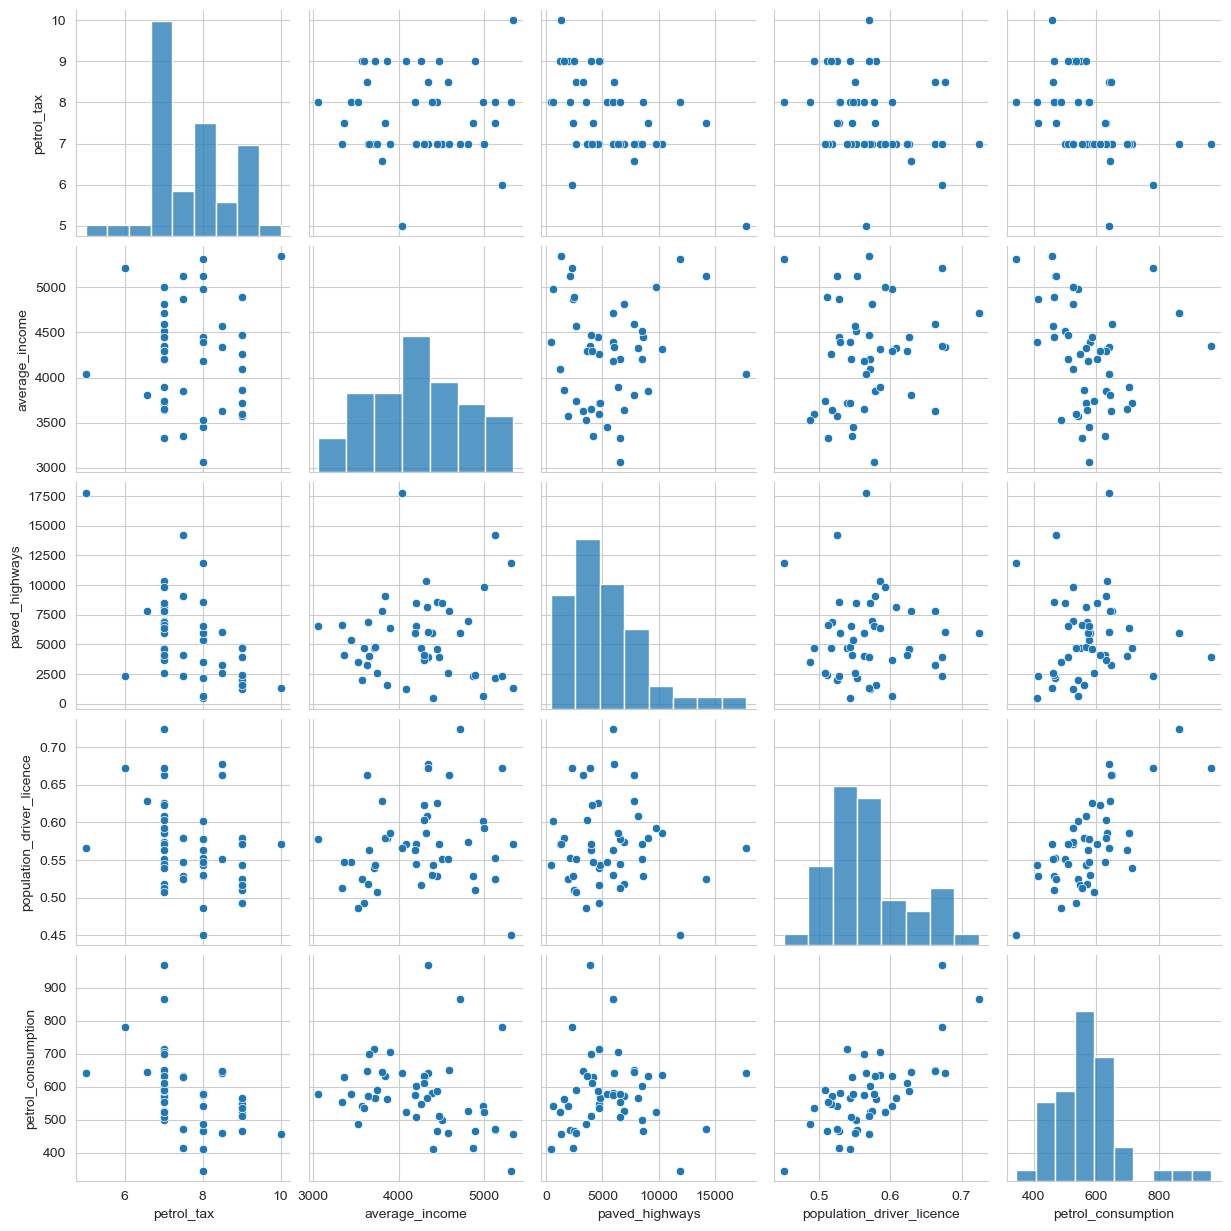

In [53]:
#df_petrol.colums = ['petrol_tax','average_income','paved_highways','population_driver_licence','petrol_consumption']
sb.pairplot(df_petrol)

In [54]:
#перевірка на мультиколеніарність
print(df_petrol.corr())
#сильних залежностей не виявлено

                           petrol_tax  average_income  paved_highways  \
petrol_tax                   1.000000        0.012665       -0.522130   
average_income               0.012665        1.000000        0.050163   
paved_highways              -0.522130        0.050163        1.000000   
population_driver_licence   -0.288037        0.157070       -0.064129   
petrol_consumption          -0.451280       -0.244862        0.019042   

                           population_driver_licence  petrol_consumption  
petrol_tax                                 -0.288037           -0.451280  
average_income                              0.157070           -0.244862  
paved_highways                             -0.064129            0.019042  
population_driver_licence                   1.000000            0.698965  
petrol_consumption                          0.698965            1.000000  


In [56]:
# вилучаємо данні для регресії, отдельно Х і у
df_petrol_data = df_petrol[['petrol_tax','average_income','paved_highways','population_driver_licence']].values
df_petrol_target = df_petrol[['petrol_consumption']].values

df_petrol_data_names = ['petrol_tax','average_income','paved_highways','population_driver_licence']

X,y = scale(df_petrol_data),df_petrol_target

In [60]:
#будуємо модель
line_reg = LinearRegression()
line_reg.fit(X,y)

print('Оцінка якості моделі за допомогою коефіцієнта детермінації R2:',line_reg.score(X,y))

Оцінка якості моделі за допомогою коефіцієнта детермінації R2: 0.6786867115698207


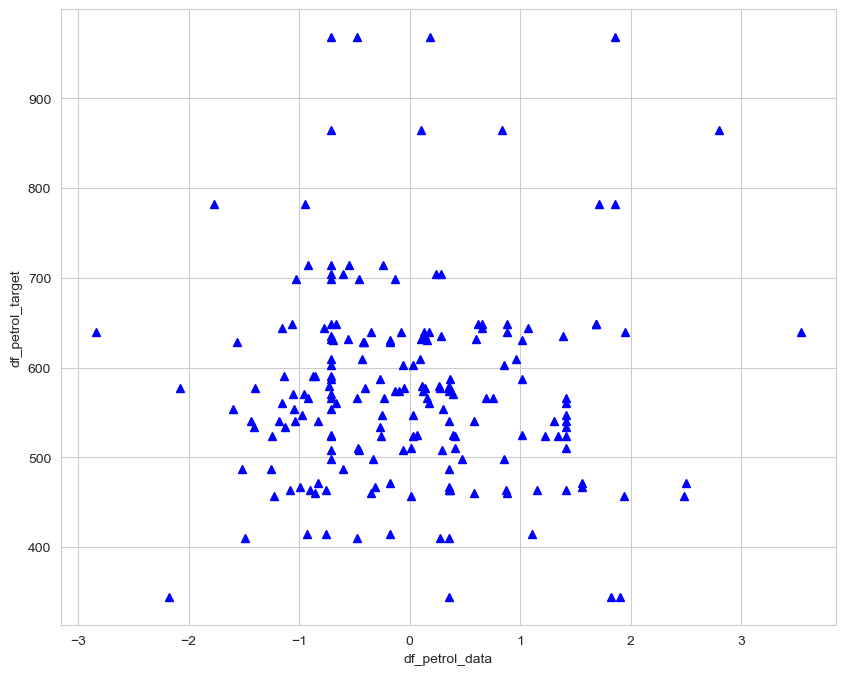

In [59]:
plt.plot(X, y, 'b^')
plt.xlabel('df_petrol_data')
plt.ylabel('df_petrol_target')
plt.show()